## Energy Consumption

- importing
  

In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

import warnings 
warnings.filterwarnings('ignore')

- Reading the files

In [22]:
df_test = pd.read_csv("/Users/prudvikseemakurthi/Desktop/archive/test_energy_data.csv")
df_test.head(10)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
5,Industrial,31207,47,28,22.82,Weekday,5026.23
6,Residential,39227,18,44,23.36,Weekend,4404.56
7,Residential,7814,21,19,27.27,Weekday,2394.37
8,Industrial,20482,24,16,23.00,Weekend,3969.09
9,Industrial,21030,90,35,12.96,Weekday,5136.69


In [23]:
df_train = pd.read_csv("/Users/prudvikseemakurthi/Desktop/archive/train_energy_data.csv")
df_train.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


- understanding the data

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [8]:
df_train.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


In [9]:
df_test.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


# Understandings
- The dataset has information about different buildings like their size, number of people, and how many appliances they use.
- 'Building Type' tells us what kind of building it is, such as Residential or Commercial. Since this is not a number, we need to convert it    before using it in a model.
- The 'Day of Week' column shows whether the data is from a weekday or weekend, and this also needs to be changed into a number.
- We can use the numeric columns like 'Square Footage' and 'Average Temperature' right away without any changes.
- To build a good prediction model, we must first clean the data and convert any text into numbers, especially for 'Building Type' and 'Day     of Week'.

## cleaning

In [10]:
df_train.columns = df_train.columns.str.strip()
df_test.columns = df_test.columns.str.strip()

In [6]:
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_train.select_dtypes(include='object').columns

In [7]:
# Cleaning train data
df_train[numeric_cols] = df_train[numeric_cols].fillna(df_train[numeric_cols].mean())
df_train = df_train.dropna(subset=categorical_cols)

In [8]:
# Cleaning test data
df_test[numeric_cols] = df_test[numeric_cols].fillna(df_test[numeric_cols].mean())
df_test = df_test.dropna(subset=categorical_cols)

In [9]:
# Droping duplicates
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

## Graphs and Analysis 

In [11]:
# bar chart for bulding type and enery consumption
avg_energy_by_type = df_train.groupby("Building Type")["Energy Consumption"].mean()

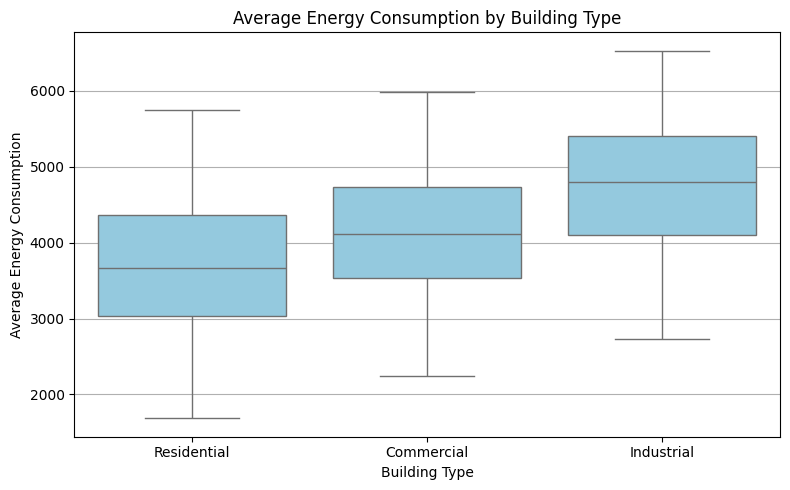

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='Building Type', y='Energy Consumption',color='skyblue')
plt.title('Average Energy Consumption by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Average Energy Consumption')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

This tells us that Industrial buildings are the biggest energy users, which makes sense due to heavy machinery, production processes, and larger operational demands.

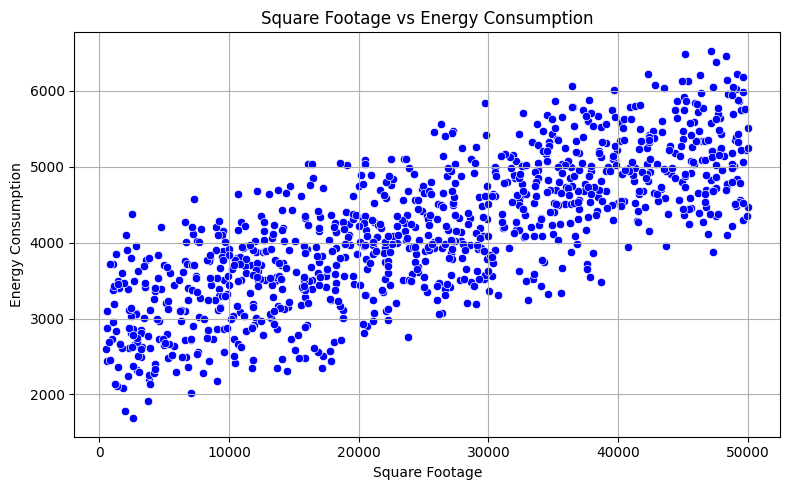

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_train, x='Square Footage', y='Energy Consumption', color='blue')
plt.title('Square Footage vs Energy Consumption')
plt.xlabel('Square Footage')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

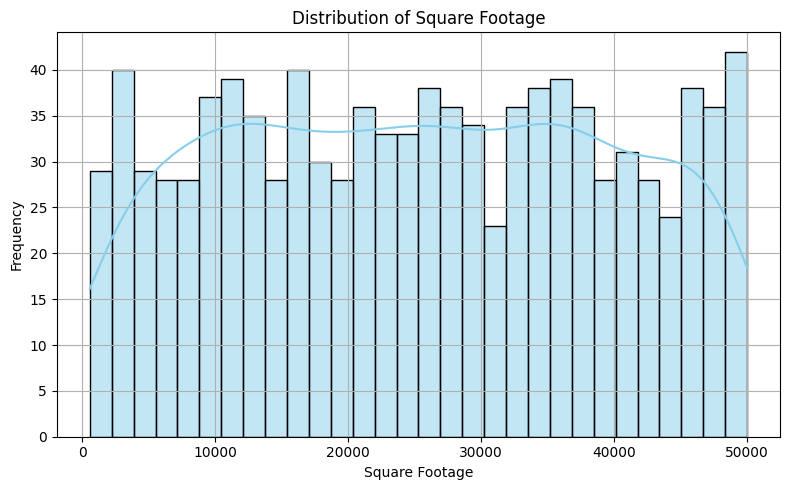

In [30]:
# Plot the distribution of Square Footage
plt.figure(figsize=(8, 5))
sns.histplot(data=df_train, x='Square Footage', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


Buildings with square footage between 40,000 and 50,000 consume the most energy on average

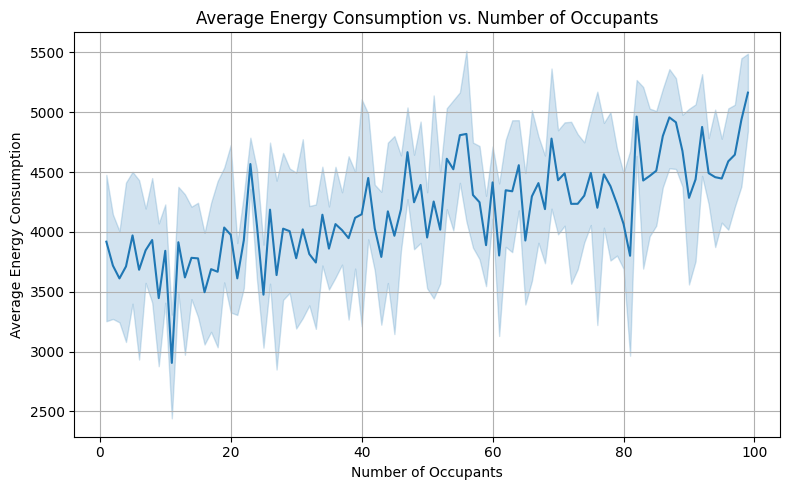

In [37]:
# Plotting the Relationship Between Number of Occupants and Average Energy Consumption
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_train.sort_values('Number of Occupants'), 
             x='Number of Occupants', y='Energy Consumption')
plt.title('Average Energy Consumption vs. Number of Occupants')
plt.xlabel('Number of Occupants')
plt.ylabel('Average Energy Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

Buildings with 81 to 100 occupants consume the most energy on average, suggesting that energy usage increases with more people inside a building

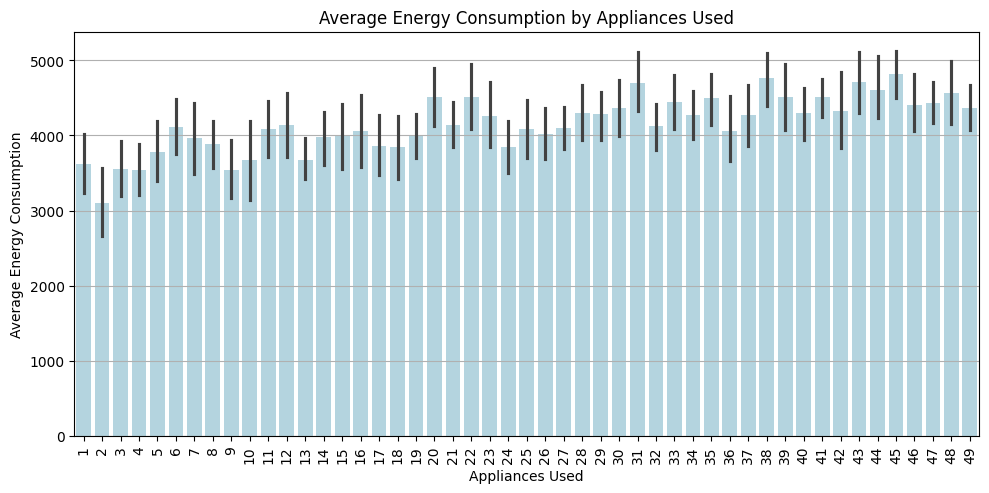

In [38]:
# Analysis: Impact of Appliances Used on Energy Consumption

plt.figure(figsize=(10, 5))
sns.barplot(data=df_train, x='Appliances Used', y='Energy Consumption', estimator=np.mean, color='lightblue')
plt.title('Average Energy Consumption by Appliances Used')
plt.xlabel('Appliances Used')
plt.ylabel('Average Energy Consumption')
plt.grid(axis='y')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Buildings with a higher number of appliances tend to consume more energy on average, showing a clear positive relationship.

In [15]:
# Impact of Average Temperature on Energy Consumption (Using pd.cut for Ranges)

# Bin the 'Average Temperature' column into defined ranges
df_train['Temperature Range'] = pd.cut(
    df_train['Average Temperature'],
    bins=[10, 15, 20, 25, 30, 35],
    labels=['10-15', '16-20', '21-25', '26-30', '31-35']
)

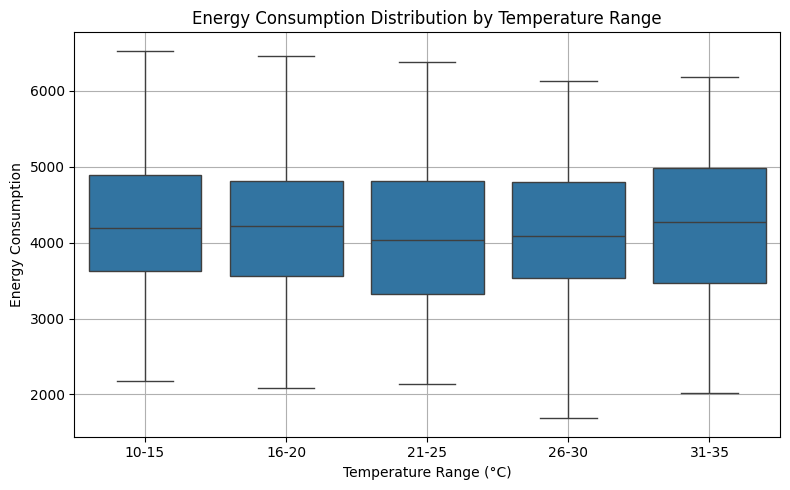

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='Temperature Range', y='Energy Consumption')
plt.title('Energy Consumption Distribution by Temperature Range')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()


Buildings experience the highest average energy consumption in the 31–35°C temperature range,

In [54]:
df_train.drop("Rounded Temp", axis=1, inplace=True)

In [55]:
df_train

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption,Appliance Range,Temperature Range
0,Residential,7063,76,10,29.84,Weekday,2713.95,1-10,26-30
1,Commercial,44372,66,45,16.72,Weekday,5744.99,41-50,16-20
2,Industrial,19255,37,17,14.30,Weekend,4101.24,11-20,10-15
3,Residential,13265,14,41,32.82,Weekday,3009.14,41-50,31-35
4,Commercial,13375,26,18,11.92,Weekday,3279.17,11-20,10-15
...,...,...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21,41-50,21-25
996,Industrial,12194,7,22,14.67,Weekend,3546.34,21-30,10-15
997,Commercial,39562,88,20,32.18,Weekday,5147.21,11-20,31-35
998,Residential,8348,67,37,16.48,Weekend,3244.98,31-40,16-20


# Linear Regression Model question 1


In [11]:
X = df_train[['Square Footage']]  # only one feature
y = df_train['Energy Consumption']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [16]:
print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", round(rmse, 2))



Slope (coefficient): 0.050016164467824774
Intercept: 2880.4242146357947
Mean Squared Error: 281833.0393215384
R² Score: 0.6538954518294215
Root Mean Squared Error (RMSE): 530.88


In [20]:
# Correlation with target
correlations = df_train.corr(numeric_only=True)['Energy Consumption'].sort_values(ascending=False)

print("Correlation with Energy Consumption:")
print(correlations)


Correlation with Energy Consumption:
Energy Consumption     1.000000
Square Footage         0.774873
Number of Occupants    0.354485
Appliances Used        0.312792
Average Temperature   -0.034487
Name: Energy Consumption, dtype: float64


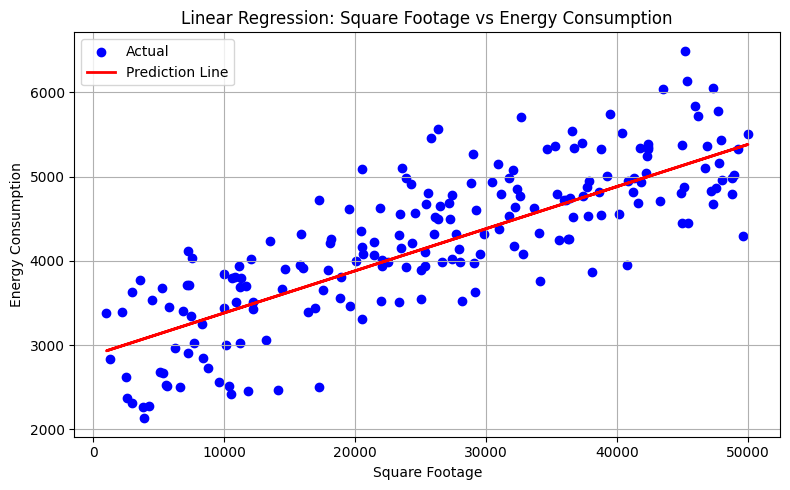

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction Line')
plt.title('Linear Regression: Square Footage vs Energy Consumption')
plt.xlabel('Square Footage')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

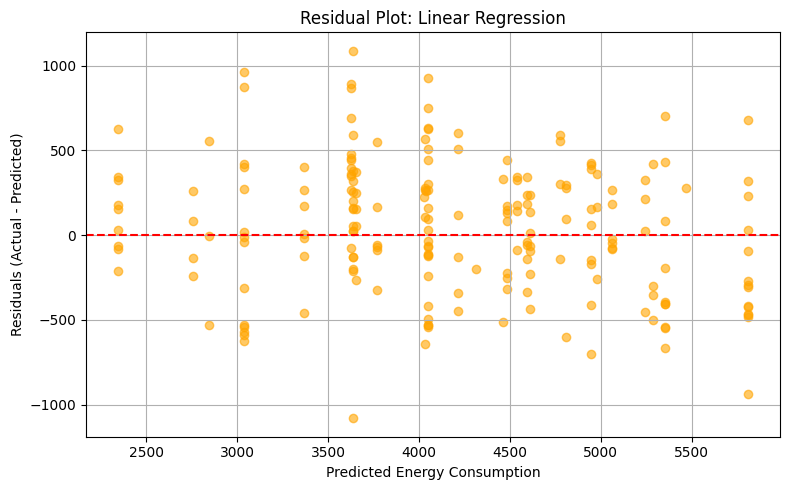

In [10]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='orange', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot: Linear Regression')
plt.xlabel('Predicted Energy Consumption')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.tight_layout()
plt.show() 

## Iterpretation
- Square footage alone is a strong predictor of energy consumption, with a clear positive relationship.
- For every additional 1 square foot, energy consumption increases by 0.05 units on average.
- If a building had 0 square footage (theoretical), it would still consume around 3200 units of energy.
- This means that 68% of the variation in energy consumption can be explained using square footage alone.
- The residuals are spread fairly evenly above and below zero, which suggests that the linear regression model is generally a good fit — though the scatter shows some variability, especially at mid-range predictions.

# Random forest question 2 part_1

In [31]:
df_encoded = pd.get_dummies(df_train, columns=['Building Type', 'Day of Week'], drop_first=True)

In [32]:
X = df_encoded.drop('Energy Consumption', axis=1)
y = df_encoded['Energy Consumption']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

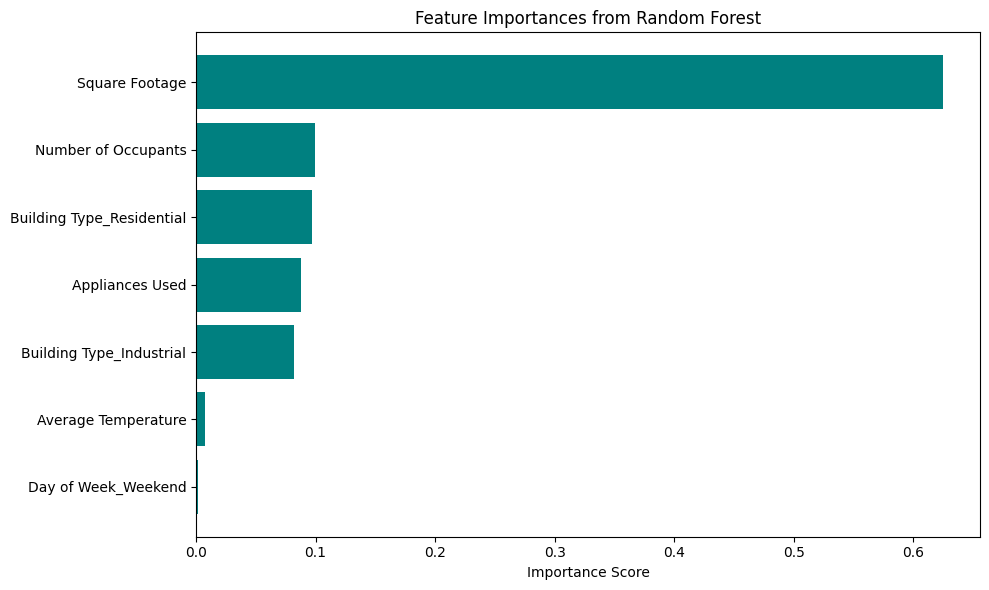

In [36]:
# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.gca().invert_yaxis()
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

Square Footage is by far the most important feature in predicting energy consumption, with all other features contributing much less by comparison.

In [39]:
y_pred = rf.predict(X_test)

Using a Random Forest model, we found that Square Footage is the most important feature for identifying high vs low energy use, and the model is highly reliable with an R² score of around 0.98

In [40]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("R² Score:", round(r2, 3))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("Mean Absolute Error (MAE):", round(mae, 2))

R² Score: 0.981
Mean Squared Error (MSE): 15613.3
Root Mean Squared Error (RMSE): 124.95
Mean Absolute Error (MAE): 97.94


# Decision Tree question 1 part_2

R² Score: 0.816
Mean Squared Error (MSE): 149881.57
Root Mean Squared Error (RMSE): 387.15
Mean Absolute Error (MAE): 314.25


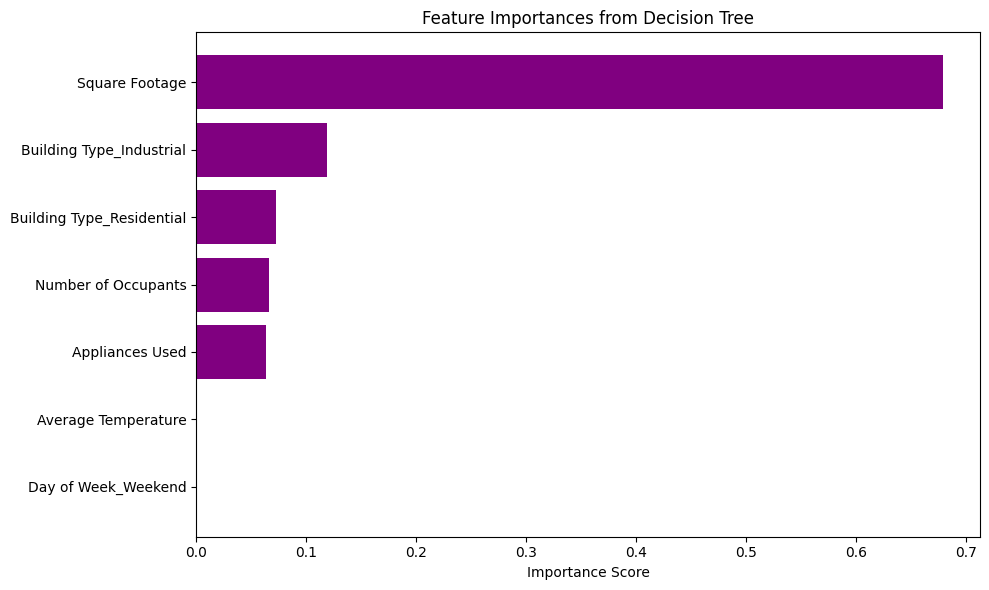

In [41]:
# Prepare your data (use the already encoded dataset)
X = df_encoded.drop('Energy Consumption', axis=1)
y = df_encoded['Energy Consumption']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree regressor
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("R² Score:", round(r2, 3))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("Mean Absolute Error (MAE):", round(mae, 2))

# Get feature importances
importances = dt.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')
plt.gca().invert_yaxis()
plt.title('Feature Importances from Decision Tree')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

Square Footage is the most important factor in predicting how much energy a building uses, while things like building type, number of people, and appliances matter less.